In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sys
import time
import tensorflow as tf
from tensorflow import keras

for module in mpl,sklearn,tf,keras:
    print(module.__name__,module.__version__)

In [ ]:
print(os.listdir("../input/10-monkey-species/"))

train_dir = "/kaggle/input/10-monkey-species/training/training"
valid_dir = "/kaggle/input/10-monkey-species/validation/validation"
label_file = "/kaggle/input/10-monkey-species/monkey_labels.txt"

print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

In [ ]:
labels = pd.read_csv(label_file,header = 0)
print(labels.head(10))

In [ ]:
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height,width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./ 255,
)

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size = (height,width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = False,
                                                   class_mode = "categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num)
print(valid_num)
    

In [ ]:
for i in range(2):
    x,y = train_generator.next()
    print(x.shape,y.shape)
    print(y)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32,kernel_size = 3,
                        padding = "same",
                        activation = "relu",
                        input_shape = [width,height,channels]),
    keras.layers.Conv2D(filters = 32,kernel_size = 3,
                        padding = "same",
                        activation = "relu"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Conv2D(filters = 64,kernel_size = 3,
                        padding = "same",
                        activation = "relu",),
    keras.layers.Conv2D(filters = 64,kernel_size = 3,
                        padding = "same",
                        activation = "relu"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Conv2D(filters = 128,kernel_size = 3,
                        padding = "same",
                        activation = "relu",),
    keras.layers.Conv2D(filters = 128,kernel_size = 3,
                        padding = "same",
                        activation = "relu"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(num_classes,activation = "softmax"),
])

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

model.summary()

In [ ]:
epochs = 200
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size)

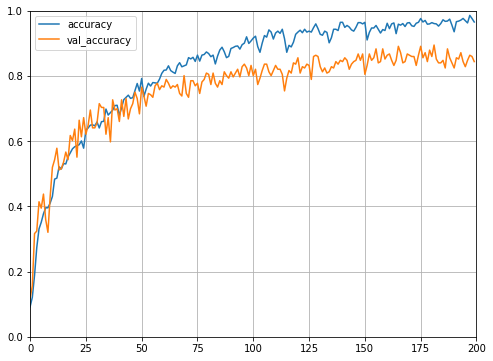

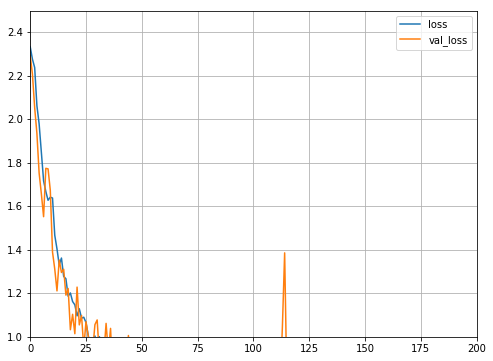

In [11]:
def plot_learning_curve(history,label,epochs,min_value,max_value):
    data = {}
    data[label] = history.history[label]
    data["val_" + label] = history.history["val_" + label]
    pd.DataFrame(data).plot(figsize = (8,6))
    plt.grid(True)
    plt.axis([0,epochs,min_value,max_value])
    plt.show()
    
plot_learning_curve(history,"accuracy",epochs,0.,1.)
plot_learning_curve(history,"loss",epochs,0.,2.5)

In [ ]:
print(history.history)